# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

## NYC MATH TEST 2006-2011

## Introduccion
En este programa se presnetara el acomodo de el dataset City
"2006 - 2011 NYS Math Test Results by Grade - Citywide - by Race-Ethnicity".
En donde se ve las calificaciones obtenidas divididas en por grados y raza etnicas. En los "Levels" se encuentra el nivel de co petencia que se tiene en cada grado.

In [2]:
#pip install seaborn

     |████████████████████████████████| 292 kB 4.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

# Descripcion de Variables
### Variables Categoricas:
Grade - Grado que se cursa 

Year - año

Category - raza etnica

Number Tested - Personas que presentaron

### Variables Numericas

Mean Scale Score - Ponderacion de las calificaciones 

Level # - Nivel de Competencia 

Level % - Nivel de Competencia

In [5]:
df = pd.read_csv('NYS_Math_Test_Results.csv')
df

,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,3,2006,Asian,9768,700,243,2.5,543,5.6,4128,42.3,4854,49.7,8982,92.0
1,4,2006,Asian,9973,699,294,2.9,600,6.0,4245,42.6,4834,48.5,9079,91.0
2,5,2006,Asian,9852,691,369,3.7,907,9.2,4379,44.4,4197,42.6,8576,87.0
3,6,2006,Asian,9606,682,452,4.7,1176,12.2,4646,48.4,3332,34.7,7978,83.1
4,7,2006,Asian,9433,671,521,5.5,1698,18.0,4690,49.7,2524,26.8,7214,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,5,2011,White,10808,699,311,2.9,1709,15.8,4532,41.9,4256,39.4,8788,81.3
164,6,2011,White,9875,695,409,4.1,1818,18.4,3435,34.8,4213,42.7,7648,77.4
165,7,2011,White,9679,690,423,4.4,1739,18.0,3023,31.2,4494,46.4,7517,77.7
166,8,2011,White,9570,688,433,4.5,2190,22.9,4142,43.3,2805,29.3,6947,72.6


#### Pregunta 1
Cual es la Raza Etnica con el promedio mas alto?

Entre que resultados se tiene en el promedio?

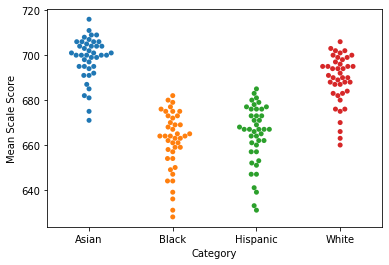

In [6]:
sns.swarmplot(x = 'Category',
              y = 'Mean Scale Score',
              data = df
             )

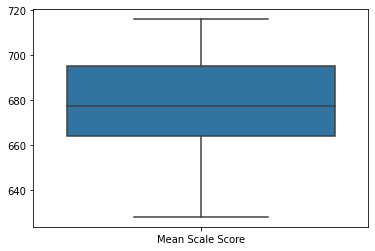

In [7]:
sns.boxplot(data = df.loc[:, ['Mean Scale Score']],
             )

#### Resultados

- Los asiaticos son los que mejor promedio generan.

- Existe un range en el promedio de calificacion 620 a 720.

## Preguntas 2

En que grados se obtuvo la mejor y la peor calificacion tanto individual como grupal? 

Existe un nivel de competitividad mejor en cada nivel? Y entre que rangos se califican los niveles "Level %"?

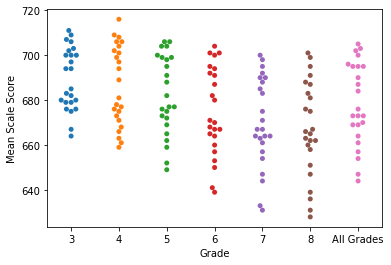

In [8]:
sns.swarmplot(x = 'Grade',
              y = 'Mean Scale Score',
              data = df
             )

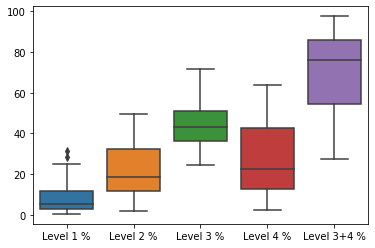

In [9]:
sns.boxplot(data = df.loc[:, ['Level 1 %', 'Level 2 %',
       'Level 3 %', 'Level 4 %', 'Level 3+4 %']],
             )

#### Resultados
- En cuarto grade fue en donde se obtuvo el valor mas alto y en octavo grado se obtuvo la califcacion mas baja. Tambien encontramos que los mejores promedios estan en tercer y cuarto grado tienen las mejores calificaciones, mientras que septimo y octavo grado obtuvieron las peores.
- Y los rangos en el nivel % son de 0 a 100 indicando que se habla de porcentaje y podemos ver que si existe un crecimiento de competitividad en cada nivel excepto por el nivel 4 que se redujo este porcentaje.

## Preguntas 3
Cual es la Categoria que mas presenta el examen?

Existe algun orden de mejores categorias en los años de 2006 al 2011?

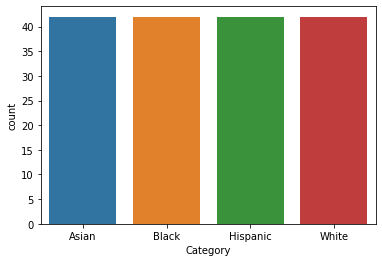

In [10]:
sns.countplot(x = 'Category',data = df)

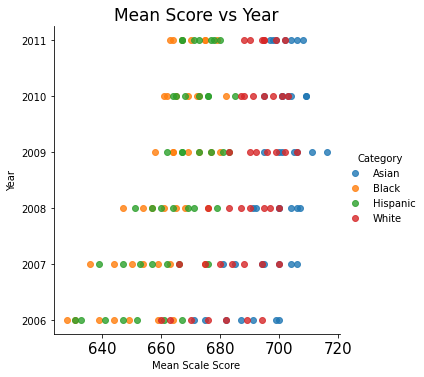

In [11]:
sns.lmplot (x= 'Mean Scale Score',
            y = 'Year',
            data = df,
            fit_reg = False,
            hue = 'Category'
            
           )
plt.title('Mean Score vs Year', fontsize = 17)
plt.xticks(fontsize = 15)
plt.show()

#### Resultados
- Presentaron la misma cantidad de personas de cada raza etnica. 
- Y existe un orden de categorias con mejor calificacion, en esta encontramos un orden en todos los años donde los 'Asian' se encuentran siempre en primer lugar, segundo lugar 'White', tercer lugar 'Hispanic' y cuarto lugar 'Black'. Encontramos este patron todos los años.

## CONCLUSION
- Como quedaria acomodado de mejor manera una tabla pivote. Viendo el promedio de calificaciones de cada raza etnica en cada grado.

In [12]:
my_pivot = pd.pivot_table(df,
                          index = 'Grade',
                          values = ['Mean Scale Score','Number Tested'],
                          columns = 'Category',
                          aggfunc = 'mean'
                         )
my_pivot  

Mean Scale Score                                     Number Tested  \
Category              Asian       Black    Hispanic       White         Asian   
Grade                                                                           
3                705.000000  676.000000  678.333333  698.833333  10351.000000   
4                707.000000  669.166667  672.166667  698.166667  10323.333333   
5                701.833333  665.500000  668.833333  693.500000  10349.666667   
6                697.000000  657.000000  660.000000  685.833333  10087.333333   
7                690.166667  653.000000  655.833333  681.500000  10144.000000   
8                690.333333  649.000000  652.500000  676.666667  10311.333333   
All Grades       698.666667  661.166667  664.500000  689.333333  61566.666667   

                                                        
Category            Black       Hispanic         White  
Grade                                                   
3            21343.666667   28854.666667  10759.166667  
4            21490.833333   28589.166667  10475.833333  
5            21620.000000   28497.333333  10276.000000  
6            21949.666667   28166.833333   9820.833333  
7            22982.500000   28765.666667   9773.500000  
8            23565.000000   29168.000000   9938.666667  
All Grades  132951.666667  172041.666667  61044.000000

## Limitaciones
- No existen muchas opciones de valores numericas generales como la de 'Mean Score', haciendo dificil las comparaciones entre este tipo de variables.

## Hallazgos
- Encontre un orden categorico que me llamo mucho la atencion ya que esta tendencia de primer a cuarto lugar se sigue en todos los años. Tambien otro hallazgo que encontre es que los menores grados obtienen mejores calificaciones.